In [6]:
# https://github.com/patrickloeber/pytorchTutorial/blob/master/07_linear_regression.py

import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from sklearn import datasets

In [5]:
torch.__version__

'2.0.1'

In [7]:
# 0. prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

# cast to float tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
# reshape y
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

In [8]:
# 1. model
# linear model, f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

In [9]:
# 2. loss and optimizer
lr = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

epoch: 10, loss = 4053.1987
epoch: 20, loss = 2857.1799
epoch: 30, loss = 2041.6442
epoch: 40, loss = 1485.4341
epoch: 50, loss = 1106.0118
epoch: 60, loss = 847.1349
epoch: 70, loss = 670.4709
epoch: 80, loss = 549.8881
epoch: 90, loss = 467.5682
epoch: 100, loss = 411.3598


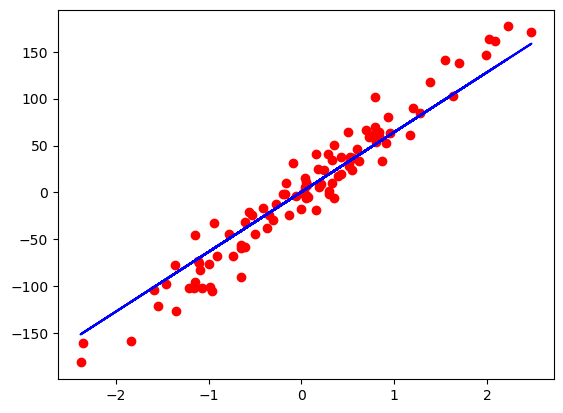

In [11]:
# 3. training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # backward pass and update
    loss.backward()
    optimizer.step()
    
    # zero grad before new step
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f"epoch: {epoch + 1}, loss = {loss.item():.4f}")
        
# plot
predicted = model(X).detach().numpy()
    
plt.plot(X_numpy, y_numpy, "ro")
plt.plot(X_numpy, predicted, "b")
plt.show()